## Sarcasm Detection in IMDb Movie Reviews

Online reviews hold immense power in the film industry, shaping audience perception and box office success. However, sarcasm a common weapon in the reviewer's arsenal, can wreak havoc on sentiment analysis systems. These automated tools struggle to decipher sarcastic intent, leading to misinterpretations that can skew audience ratings, mislead studios, and ultimately, disappoint moviegoers.<br>

![Sarcasm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQh2oNie2NZjxi-5yhoj__Og7FtVcuTz2pS4A&s)

Sarcasm detection involves identifying sarcastic remarks in text, which can be particularly challenging due to the subtlety and context-dependency of sarcasm.<br>

In this code snippet, we'll walk through the outline the steps to check the prediction of RoBERTa deep learning model for sarcasm detection in movie reviews.





### Solution Description

Our proposed solution is to build a machine learning model capable of identifying sarcasm in IMDb reviews. <br>
The approach involves several key steps:



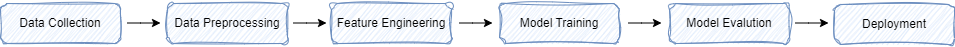
<br>



**Scope of the Solution**

**In-scope** :
- Developing a sarcasm detection model specifically for English-language IMDb
reviews.
- Evaluating model performance using a curated dataset of IMDb reviews.
- Focusing on text-based reviews, excluding multimedia content.

**Out-of-scope** :
- Detecting sarcasm in non-English reviews.
- Handling non-textual sarcasm (e.g., in images or videos or memes).
- Real-time detection of sarcasm during review submission.

### Dataset Description

- [IMDb Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
 <br>

We selected the IMDb Reviews dataset for the following reasons:


**Characteristics** : The dataset consists of a rich archive of text reviews for movies, gathered from
IMDb.<br>
**Pros** : Labeled as positive or negative review <br>
**Cons** : We're enriching our dataset by manually classifying reviews as sarcastic or non-sarcastic
using available tools
<br>
**Relevance** : The reviews are directly from IMDb, ensuring the context and language
used are highly relevant to our target application.<br>
**Volume** : The large volume of reviews provides sufficient data for training robust
machine learning models.

### Data Visualization

**Dataset Overview** :
- The dataset contains a total of 6544 data points, each representing a movie review.
- Each data point includes information about whether the review is sarcastic or not, along with other relevant features.

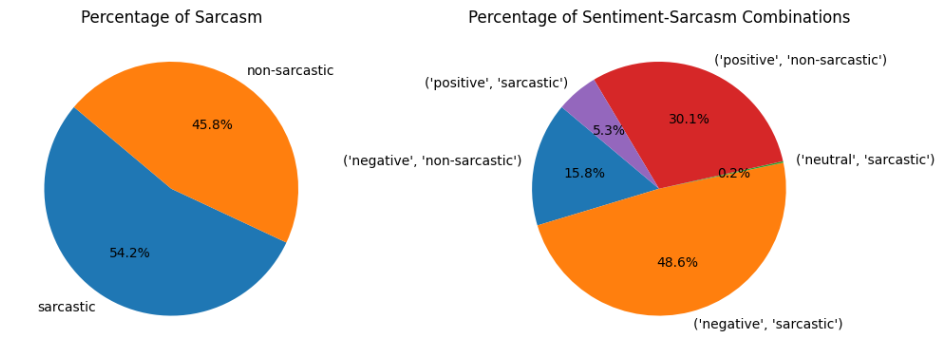

**Splitting the Data** :
To split  dataset into training, validation, and test sets, so that it will help to follow a multi-step approach. First, split the dataset into a training set and a temporary set. Then, split the temporary set into validation and test sets. <br>

- The dataset is split into training and temporary sets to evaluate the model's performance effectively.
- Using an 80-20 split, **80%** of the data (**5197 data points**) is used for training, and **20%** (**1300 data points**) is reserved for validation.

- Split the temporary set into validation and test sets.

**Train Set** : **5197** samples<br>
**Validation set** : **650** samples<br>
**Test set** : **650** samples<br>

### Split Distrubution

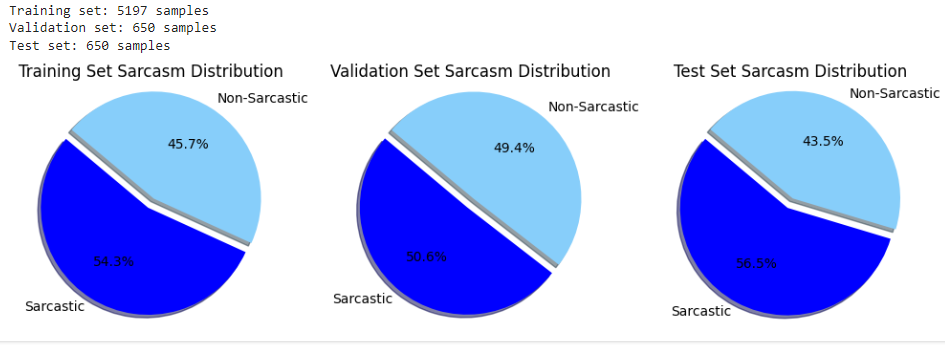


###Why Use RoBERTa for Sarcasm Detection?

RoBERTa (Robustly optimized BERT approach) is an extension of BERT (Bidirectional Encoder Representations from Transformers) designed to achieve better performance on a variety of NLP tasks, including sarcasm detection. Here are some reasons why RoBERTa might be particularly effective for your sarcasm detection in movie reviews

**Higher Capacity** :
- RoBERTa has more parameters compared to many other models, which allows it to capture complex patterns in the data, including the subtle cues associated with sarcasm.<br>

**Pre-trained on Large Datasets** :
- RoBERTa is pre-trained on larger and more diverse datasets compared to other models like BERT. This extensive pre-training allows RoBERTa to capture a richer understanding of language nuances, including sarcasm.<br>

**Dynamic Masking** :
- Unlike BERT, which uses static masking during pre-training, RoBERTa employs dynamic masking. This means the model sees different masked tokens during each epoch of training, leading to better generalization and robustness.<br>

In my experiments, I found that RoBERTa gives the highest accuracy (85%) compared to simple neural networks, CNN, and LSTM. This suggests that RoBERTa's ability to understand and represent the intricate patterns of language in movie reviews, including sarcasm, is superior to these other models. Its sophisticated architecture and extensive pre-training enable it to perform well in tasks that require deep contextual understanding.

<br>

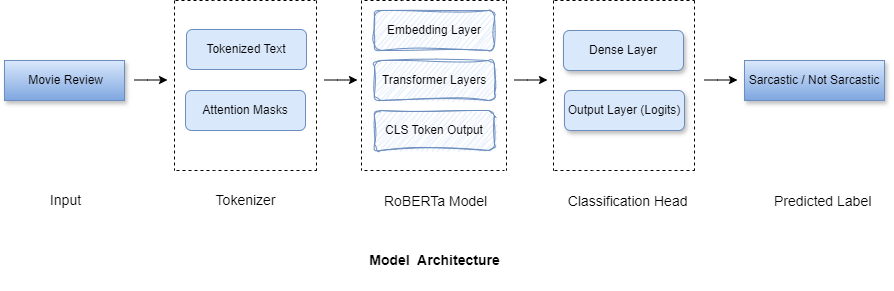

### Model Evaluation

**Accuracy and Overall Performance**:
- The RoBERTa model achieved an overall accuracy of 85.69%, which is a strong result for sarcasm detection in movie reviews.
- The model shows balanced performance across both classes (Sarcastic and Not Sarcastic), indicating that it does not heavily favor one class over the other.

**Class-wise Performance**:
- **Not Sarcastic**
  1. **Precision** : 0.83, which means that 83% of the reviews predicted as "Not Sarcastic" are actually "Not Sarcastic."
  2. **Recall** : 0.90, indicating that the model correctly identifies 90% of the actual "Not Sarcastic" reviews.
  3. **F1-Score** : 0.86, reflecting a good balance between precision and recall for this class.

- **Sarcastic**
  1. **Precision** : 0.89, meaning 89% of the reviews predicted as "Sarcastic" are indeed sarcastic.
  2. **Recall** : 0.82, showing that the model successfully detects 82% of the actual "Sarcastic" reviews.
  3. **F1-Score** : 0.85, demonstrating a high level of accuracy in both identifying and correctly classifying sarcastic reviews.

**Macro and Weighted Averages**:<br>
The macro average (0.86) and weighted average (0.86) for precision, recall, and F1-score are the same, underscoring the model's balanced performance across both classes.
<br>

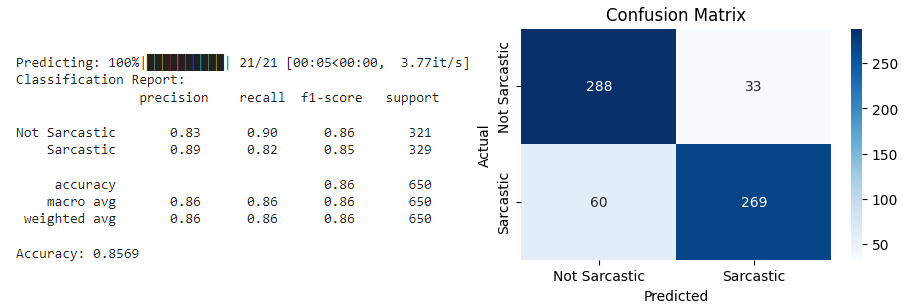

###Step 1 : Check for GPU

In [1]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Step 2 : Load the Trained Model

In [4]:
import torch
import pickle

# Define a path to load the model
model_load_path = '/content/drive/MyDrive/IMDB/BERT_model.pth'
tokenizer_load_path = '/content/drive/MyDrive/IMDB/bert_tokenizer.pkl'

# Load the tokenizer using pickle
with open(tokenizer_load_path, 'rb') as f:
    tokenizer = pickle.load(f)

# Initialize the model architecture
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Load the model's state dictionary
model.load_state_dict(torch.load(model_load_path))

# Move the model to the appropriate device
model.to(device)
model.eval()

print('Model and tokenizer loaded successfully')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model and tokenizer loaded successfully


### Step 3 : Check the prediction

In [5]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import pickle

# Define paths for the saved model and tokenizer
model_load_path = '/content/drive/MyDrive/IMDB/BERT_model.pth'
tokenizer_load_path = '/content/drive/MyDrive/IMDB/bert_tokenizer.pkl'

# Load the tokenizer using pickle
with open(tokenizer_load_path, 'rb') as f:
    tokenizer = pickle.load(f)

# Initialize the model architecture
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# Load the model's state dictionary
model.load_state_dict(torch.load(model_load_path))

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def predict_sarcasm(review, model, tokenizer, max_length=128):
    # Preprocess the input review
    inputs = tokenizer.encode_plus(
        review,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    # Make prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # Get the predicted label
    predicted_label = torch.argmax(logits, dim=1).item()

    return 'Sarcastic' if predicted_label == 1 else 'Not Sarcastic'

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
# Example usage
print()
review = "It’s amazing how the actors could keep a straight face while delivering such ridiculous lines."
prediction = predict_sarcasm(review, model, tokenizer)
print(f'Review: "{review}"')
print(f'Prediction: {prediction}')
print()

review = "Wow, what a fantastic movie!"
prediction = predict_sarcasm(review, model, tokenizer)
print(f'Review: "{review}"')
print(f'Prediction: {prediction}')
print()

review = "If you’re looking for a movie that will put you to sleep, look no further. The slow pacing and dull storyline are just what you need for a good nap."
prediction = predict_sarcasm(review, model, tokenizer)
print(f'Review: "{review}"')
print(f'Prediction: {prediction}')
print()

review = "The acting in this film was just superb"
prediction = predict_sarcasm(review, model, tokenizer)
print(f'Review: "{review}"')
print(f'Prediction: {prediction}')
print()

review = "This movie is a shining example of how to turn a beloved book into a complete disaster. The filmmakers really outdid themselves in missing the point entirely."
prediction = predict_sarcasm(review, model, tokenizer)
print(f'Review: "{review}"')
print(f'Prediction: {prediction}')
print()

review = "I absolutely adored the special effects. They reminded me of something from the early 90s. It's refreshing to see such dedication to vintage CGI."
prediction = predict_sarcasm(review, model, tokenizer)
print(f'Review: "{review}"')
print(f'Prediction: {prediction}')
print()


Review: "It’s amazing how the actors could keep a straight face while delivering such ridiculous lines."
Prediction: Sarcastic

Review: "Wow, what a fantastic movie!"
Prediction: Not Sarcastic

Review: "If you’re looking for a movie that will put you to sleep, look no further. The slow pacing and dull storyline are just what you need for a good nap."
Prediction: Sarcastic

Review: "The acting in this film was just superb"
Prediction: Not Sarcastic

Review: "This movie is a shining example of how to turn a beloved book into a complete disaster. The filmmakers really outdid themselves in missing the point entirely."
Prediction: Sarcastic

Review: "I absolutely adored the special effects. They reminded me of something from the early 90s. It's refreshing to see such dedication to vintage CGI."
Prediction: Not Sarcastic



### Summary of Sarcasm Detection Model Performance

The RoBERTa model's performance highlights its robustness and effectiveness in handling the complexities of sarcasm detection in movie reviews. Its ability to achieve high precision, recall, and F1-scores for both sarcastic and non-sarcastic classes makes it a superior model for this task.






